In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.linalg import cho_factor, cho_solve

## Determinando a lei da reação

A lei de reação será determinada a partir da análise da $\frac{d[A]}{dt}$, a partir da admissão de que o sistema será ditado por uma lei de potência:

$
\frac{d[A]}{dt} = k [A]^m [B]^n
$

Admitindo a reação:

$
A + B \rightarrow C
$

Ou seja, será feito uma regressão linear de ordem 3 para a definição de uma função polinomial que descreva a variação temporal do númeo de partículas A $[A](t)$. Em seguida, a expressão encontrada será derivada para encontrar uma expressão para $\frac{d[A]}{dt} (t)$.

In [21]:
# ordem da regressão
H = 10

b = np.transpose(np.load('concentracoes.npy')[0])
tempo = np.arange(0, len(b), 1)
A = np.zeros(((H+1), len(b)))
for i in range(H+1):
    A[i] = tempo**i
    
A = np.transpose(A)

In [22]:
b

array([80, 79, 78, 78, 77, 77, 76, 75, 74, 74, 73, 73, 73, 73, 73, 73, 73,
       73, 72, 72, 72, 72, 72, 71, 71, 71, 71, 70, 69, 69, 69, 68, 67, 67,
       67, 65, 65, 65, 65, 65, 65, 65, 64, 64, 64, 63, 63, 63, 63, 63, 63,
       63, 63, 63, 63, 63, 63, 63, 63, 63, 62, 62, 61, 61, 61, 61, 61, 60,
       58, 58, 58, 58, 58, 57, 57, 57, 57, 57, 57, 57, 56, 56, 56, 56, 55,
       55, 54, 54, 52, 52, 51, 51, 51, 51, 50, 50, 50, 50, 50, 50, 50, 49,
       49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 48, 48, 48, 48, 48, 48, 48,
       48, 48, 48, 48, 48, 47, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46,
       46, 45, 45, 45, 44, 43, 42, 42, 42, 41, 41, 41, 41, 41, 40, 40, 39,
       39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 38, 38, 37, 37, 37,
       37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 36, 36,
       36, 36, 36, 36, 36, 36, 36, 36, 35, 35, 35, 35, 35, 35])

In [23]:
A

array([[ 1.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 1.00000000e+00,  1.00000000e+00,  1.00000000e+00, ...,
         1.00000000e+00,  1.00000000e+00,  1.00000000e+00],
       [ 1.00000000e+00,  2.00000000e+00,  4.00000000e+00, ...,
         2.56000000e+02,  5.12000000e+02,  1.02400000e+03],
       ...,
       [ 1.00000000e+00,  1.98000000e+02,  3.92040000e+04, ...,
         1.27786214e+09, -3.86365952e+08,  8.08952832e+08],
       [ 1.00000000e+00,  1.99000000e+02,  3.96010000e+04, ...,
         2.15943050e+07,  2.29939900e+06,  4.57580401e+08],
       [ 1.00000000e+00,  2.00000000e+02,  4.00000000e+04, ...,
        -1.05696461e+09, -9.39524096e+08,  1.07374182e+09]])

In [24]:
x = np.linalg.lstsq(A, b, rcond='warn')[0]

C:\Users\GABRIE~1\AppData\Local\Temp/ipykernel_7204/4215769880.py:1: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  x = np.linalg.lstsq(A, b, rcond='warn')[0]


<function matplotlib.pyplot.plot(*args, scalex=True, scaley=True, data=None, **kwargs)>

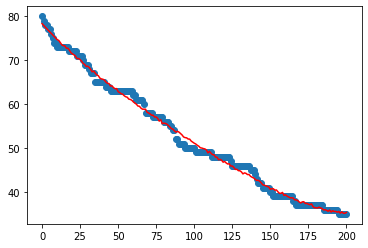

In [25]:
conc_A = 0

for i in range(H+1):
    conc_A += x[i]*tempo**i

fig = plt.figure()

plt.scatter(tempo, b)

plt.plot(tempo, conc_A, c='r')

plt.plot